<a href="https://colab.research.google.com/github/AhmedElawady74/Second-project-for-ML/blob/main/2_project_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# На синтетических данных

Importing necessary libraries

In [ ]:
import numpy as np # For numerical operations
import matplotlib.pyplot as plt #For data visualization
from sklearn.model_selection import train_test_split #For splitting the dataset
from sklearn.linear_model import LinearRegression #For linear regression modeling
from sklearn.preprocessing import PolynomialFeatures #For polynomial feature transformation
from sklearn.metrics import mean_squared_error # For evaluating model performance using mean squared error

 Введите данные в код:
  \begin{align}
        y(x) = \frac{{e}^{2x} - {e}^{-4x}\,}{{e}^{4} + {e}^{-8} }
    \end{align}
Это данные, используемые

  

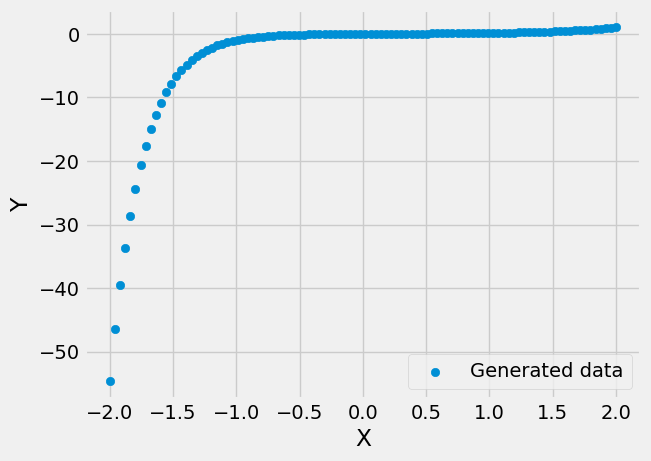

In [ ]:
# Генерация синтетических данных
def generate_data(x):
    # Замените это на функцию, которую вы хотите протестировать
    y = (np.exp(2*x) - np.exp(-4*x)) / (np.exp(4) + np.exp(-8))
    return y

#Генерация значений x
x_values = np.linspace(-2, 2, 100)

#Генерация значений y
y_values = generate_data(x_values)

# Визуализация сгенерированных данных
plt.scatter(x_values, y_values, label='Generated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

На изображении мы наблюдали, как различные синтетические данные генерируются с использованием различных математических функций, которые используют разнообразие данных для проверки его влияния на производительность модели


In [ ]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

In [ ]:
#Train linear regression model
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

Было замечено, что линейной регрессии недостаточно для обработки сложных данных. Мы попробовали разные степени полинома, чтобы улучшить производительность модели

Coefficients: [4.41184791]
Mean Squared Error: 119.58766355231958


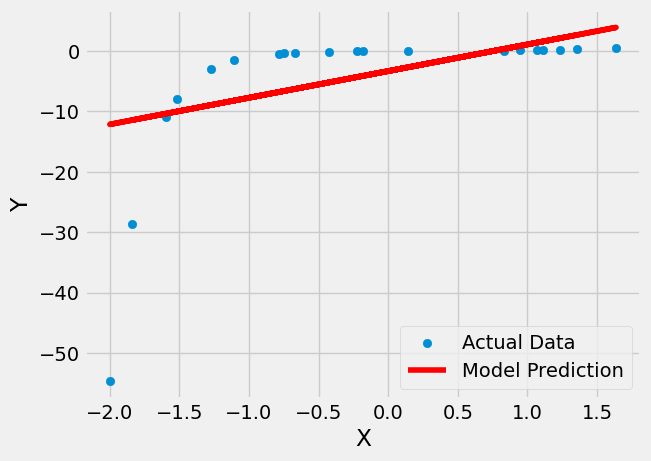

In [ ]:
# Оцените модель
y_pred = model.predict(x_val.reshape(-1, 1))
mse = mean_squared_error(y_val, y_pred)

#Отображение артефактов и показателей
print(f'Coefficients: {model.coef_}')
print(f'Mean Squared Error: {mse}')

#Визуализация прогнозов модели
plt.scatter(x_val, y_val, label='Actual Data')
plt.plot(x_val, y_pred, color='red', label='Model Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

- Фактические данные представлены в виде баллов (Actual Data).
- Прогнозы модели нарисованы в виде линии (Model Prediction) красного цвета.
- Были представлены легенды (legend) для объяснения графика

# На реальных данных

Importing necessary libraries

In [ ]:
import numpy as np  #NumPy is used for numerical operations
import pandas as pd  # Pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt #Matplotlib is used for data visualization
import seaborn as sns  #Seaborn is built on top of Matplotlib, providing a high-level interface for statistical graphics
import warnings #Warnings module allows for control over warning messages

from google.colab import files  # Import the 'files' module from the 'google.colab' library for file handling in Google Colab
from sklearn.model_selection import train_test_split, GridSearchCV  # Import functions for splitting data and performing grid search
from sklearn.linear_model import LinearRegression, Lasso, Ridge  #Import linear regression models
from sklearn.ensemble import RandomForestRegressor  #Import random forest regressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #Import scaling methods
from sklearn.metrics import mean_absolute_error, mean_squared_error  #Import evaluation metrics
from sklearn.linear_model import LassoCV, RidgeCV  # Import cross-validated Lasso and Ridge regression models

#Ignore warnings to maintain cleaner output
warnings.filterwarnings("ignore")

#Set the style for Matplotlib plots to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

In [ ]:
# Read the Dataset

# Set the link to your dataset file here
file_url = '/content/bikes_rent.csv'

#Read the dataset file
df = pd.read_csv(file_url)

# Display the first few rows of the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
# Exploring Data and Initial Checks

#Display some information about the dataset
df.info()

#Display descriptive statistics for the dataset
df.describe().T

#Display the missing values count for each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

Из этого кода мы заметили:

> Метод info() предоставляет информацию о наборе данных, включая количество ненулевых записей и типы данных каждого столбца.

> Метод описать() предлагает статистические сводки, такие как среднее значение, стандартное отклонение, минимальное и максимальное значения для каждого столбца.

> Метод isnull().sum() показывает, что ни в одном столбце нет пропущенных значений, что указывает на чистый набор данных.

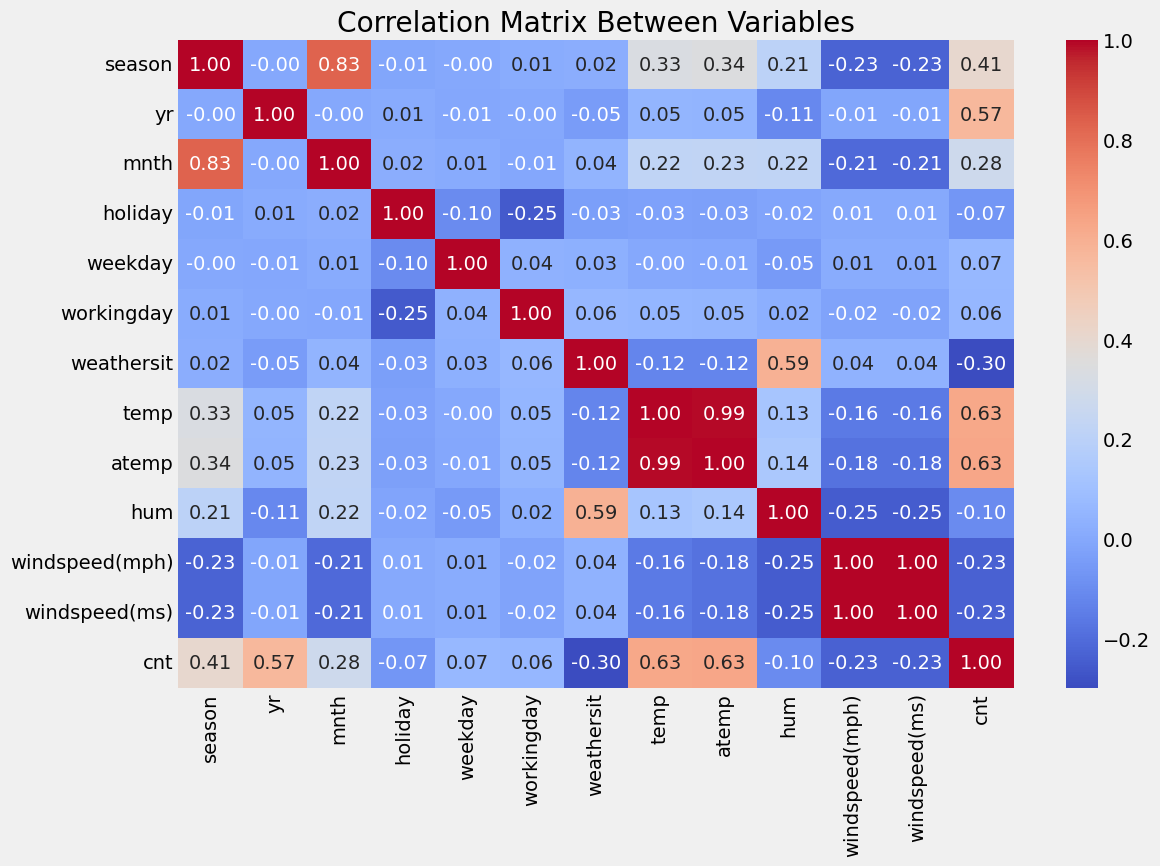

In [ ]:
# Analyzing Correlations Between Variables
correlation_matrix = df.corr() #Creating the correlation matrix for all columns
# Drawing a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Between Variables")
plt.show()

Из этого кода мы заметили:

1- Метод corr() вычисляет парную корреляцию столбцов, предоставляя представление о линейных отношениях между переменными.

2- Визуализация тепловой карты подчеркивает силу и направление корреляций. Положительные значения указывают на положительную корреляцию, а отрицательные значения указывают на отрицательную корреляцию.

3- Этот анализ помогает выявить потенциальную мультиколлинеарность и взаимосвязи между различными объектами в наборе данных.

<Axes: >

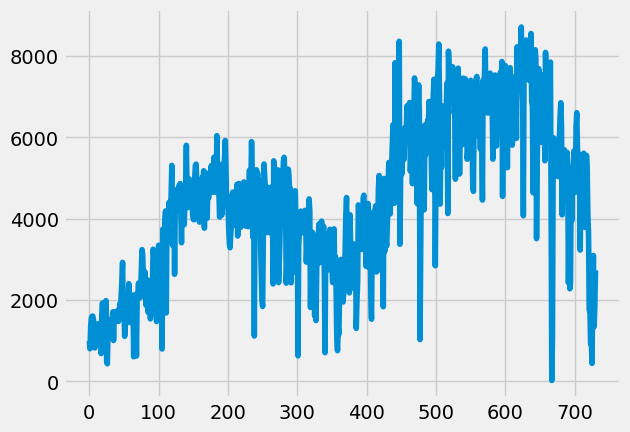

In [ ]:
df["cnt"].plot()

График количества взятых в аренду велосипедов

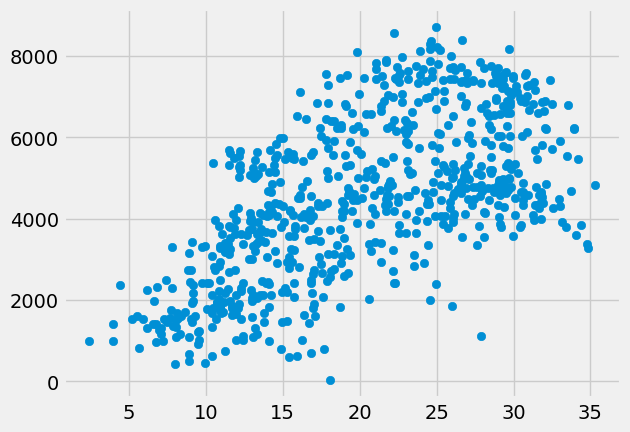

In [ ]:
plt.scatter(df["temp"], df['cnt'])

График зависимости количества арендованных велосипедов от температуры

In [ ]:
df.columns
#Имена столбцов

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')

In [ ]:
# Data Splitting and Transformation

from sklearn.model_selection import train_test_split #Import train_test_split

# Column names to be transformed
features_to_transform = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

target_variable = 'cnt' # Target variable (the column we are trying to predict)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features_to_transform], df[target_variable], test_size=0.2, random_state=42)

#Transform selected variables using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display some data after transformation
print("Some data after transformation:")
print(X_train_scaled[:5])

#Transform selected variables using MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

# Display some data after transformation using Min-Max Scaler
print("\nSome data after transformation using Min-Max Scaler:")
print(X_train_minmax[:5])

Some data after transformation:
[[ 1.3604059   0.96632025  1.32291424 -0.16236391 -0.48546612  0.70257109
   1.08723797 -0.86461022 -0.96152487  0.22342426  1.9570449   1.9570449 ]
 [ 0.45346863 -1.03485361  0.73917271 -0.16236391  0.50238132  0.70257109
   2.90657026  0.73728848  0.47558055  2.17101774  0.0267188   0.0267188 ]
 [ 1.3604059  -1.03485361  1.61478501 -0.16236391  1.49022876 -1.42334351
  -0.73209433 -1.10808691 -1.03965885 -0.12857422 -1.22697175 -1.22697175]
 [ 0.45346863 -1.03485361  0.73917271 -0.16236391 -1.47331356 -1.42334351
  -0.73209433  0.04040356  0.07426873  0.4492876  -0.15771838 -0.15771838]
 [ 0.45346863  0.96632025 -0.13643959 -0.16236391  0.0084576   0.70257109
  -0.73209433  1.08782855  1.00446601 -1.90910219  1.04848654  1.04848654]]

Some data after transformation using Min-Max Scaler:
[[1.         1.         0.90909091 0.         0.33333333 1.
  0.5        0.35413039 0.32048692 0.68874494 0.76258632 0.76258632]
 [0.66666667 0.         0.72727273 0.  

Наблюдения:

> Код разделяет набор данных на наборы для обучения и тестирования, чтобы оценить производительность модели,он стандартизирует выбранные переменные, используя StandardScaler и MinMaxScaler.

> Отображаются данные образца после каждого преобразования, демонстрируя стандартизованные и нормализованные значения.

In [ ]:
#  Building the Base Model (Linear Regression Model)
linreg = LinearRegression()

#Training the model on the training data
linreg.fit(X_train, y_train)

# Predicting values on the test data
y_pred = linreg.predict(X_test)

Этот код используется для создания и обучения базовой модели линейной регрессии для прогнозирования целевой переменной с использованием выбранных функций в наборе данных.

In [ ]:
# Training Lasso Model
lasso = Lasso()
lasso.fit(X_train, y_train)

# Predicting values on the test data using Lasso
y_pred_lasso = lasso.predict(X_test)

#Calculating the performance metric (RMSE) using Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'RMSE with Lasso: {rmse_lasso}')

RMSE with Lasso: 831.8641294371118


Код применяет регрессию Лассо для обучения, прогнозирует на тестовом наборе и оценивает производительность с помощью RMSE. Лассо помогает в регуляризации, чтобы улучшить обобщение модели, предотвращая переобучение.

In [ ]:
# Train Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

# Predict values on the test set using Ridge
y_pred_ridge = ridge.predict(X_test)

# Calculate the performance metric (RMSE) using Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'RMSE with Ridge: {rmse_ridge}')

RMSE with Ridge: 831.925258592659


Используется Лассо для выбора признаков из-за его способности давать редкие коэффициенты (исключение признаков). Позже для сравнения использовал Ridge, поскольку он использует регуляризацию L2, создавая неразреженные коэффициенты и предлагая альтернативный подход, основанный на характеристиках набора данных и целях моделирования.

In [ ]:
# Evaluating Model Performance
baseline_rmse = np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))
print(f'Baseline Model RMSE: {baseline_rmse}')

#evaluating Model Performance using Lasso
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
print(f'Lasso Model RMSE: {lasso_rmse}')

# rvaluating Model Performance using Ridge
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
print(f'Ridge Model RMSE: {ridge_rmse}')

#Comparing Model Performances
model_comparison = pd.DataFrame({
    'Model': ['Baseline', 'Lasso', 'Ridge'],
    'RMSE': [baseline_rmse, lasso_rmse, ridge_rmse]
})
print(model_comparison)

Baseline Model RMSE: 830.5571212167323
Lasso Model RMSE: 831.8641294371118
Ridge Model RMSE: 831.925258592659
      Model        RMSE
0  Baseline  830.557121
1     Lasso  831.864129
2     Ridge  831.925259


Предоставленный код оценивает производительность трех моделей: базовой модели линейной регрессии, модели регрессии Лассо и модели регрессии Риджа. Среднеквадратическая ошибка (RMSE) используется в качестве показателя для измерения производительности каждой модели на тестовых данных. Затем результаты сравниваются в DataFrame, показывая значения RMSE для каждой модели. Это позволяет нам оценить, насколько хорошо работают регуляризованные модели (Лассо и Ридж) по сравнению с базовой моделью. В общем, цель состоит в том, чтобы наблюдать, способствуют ли Лассо и Ридж повышению эффективности прогнозирования за счет устранения переобучения и улучшения обобщения модели.